In [8]:
!pip install textblob

     ------------------------------------- 636.8/636.8 kB 90.3 kB/s eta 0:00:00


In [92]:
import re
from textblob import TextBlob
import pandas as pd 
import json
import matplotlib.pyplot as plt

In [101]:
# load data 
df = pd.read_csv('Data/Bitcoin.csv')

In [102]:
df['Tweets'] = df['message'].apply(lambda data: json.loads(data)['data']['text'])

In [103]:
df

Unnamed: 0                                            message  \
0          NaN  {"data": {"edit_history_tweet_ids": ["16139571...   
0          NaN  {"data": {"edit_history_tweet_ids": ["16139571...   
0          NaN  {"data": {"edit_history_tweet_ids": ["16139571...   
0          NaN  {"data": {"edit_history_tweet_ids": ["16139571...   
0          NaN  {"data": {"edit_history_tweet_ids": ["16139571...   
..         ...                                                ...   
0          NaN  {"data": {"edit_history_tweet_ids": ["16139596...   
0          NaN  {"data": {"edit_history_tweet_ids": ["16139596...   
0          NaN  {"data": {"edit_history_tweet_ids": ["16139596...   
0          NaN  {"data": {"edit_history_tweet_ids": ["16139596...   
0          NaN  {"data": {"edit_history_tweet_ids": ["16139596...   

                                               Tweets  
0   RT @TheCryptoZombie: 🚨 EMERGENCY #BITCOIN UPDA...  
0       @RollbitRewards @JoshuaF_426 @CindySm10925902  
0   RT @Angry_Red_Bull: 🏵 CoinEx Long Vs Short Eve...  
0         @RollbitRewards @Ponchobird2209 @ukquotess0  
0   @gentrycreates @WatcherGuru Currently there is...  
..                                                ...  
0   RT @BitcoinMagazine: NEW - U.S. Senator Ted Cr...  
0   RT @PlayTrivians: 💰 25$ worth of $TRIVIA + Pow...  
0                    @krabs04 https://t.co/z4CmLbFZMx  
0   RT @Bitcoin: 😂\n\nHoliday dinners with @PeterS...  
0   RT @nusretozer: #KRIPTO \n#KriptoKoin\n#kripto...  

[2194 rows x 3 columns]

In [104]:
# remove_links
def cleanTweet(tweet: str) -> str:
    tweet = re.sub(r'http\S+', '', str(tweet))
    tweet = re.sub(r'bit.ly/\S+', '', str(tweet))
    tweet = tweet.strip('[link]')

    # remove users
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', str(tweet))
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', str(tweet))

    # remove puntuation
    my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@â'
    tweet = re.sub('[' + my_punctuation + ']+', ' ', str(tweet))

    # remove number
    tweet = re.sub('([0-9]+)', '', str(tweet))

    # remove hashtag
    tweet = re.sub('(#[A-Za-z]+[A-Za-z0-9-_]+)', '', str(tweet))

    return tweet


# Create a function to get the subjectifvity
def getSubjectivity(tweet: str) -> float:
    return TextBlob(tweet).sentiment.subjectivity


# Create a function to get the polarity
def getPolarity(tweet: str) -> float:
    return TextBlob(tweet).sentiment.polarity


def getSentiment(polarityValue: int) -> str:
    if polarityValue < 0:
        return 'Negative'
    elif polarityValue == 0:
        return 'Neutral'
    else:
        return 'Positive'


In [105]:
# Clean the Tweets
df['Cleaned_Tweets'] = df['Tweets'].apply(cleanTweet)

In [106]:
#Create two new columns called 'subjectivity' and 'Polarity'
df['Subjectivity'] = df['Cleaned_Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Cleaned_Tweets'].apply(getPolarity)

In [107]:

#Create a column to score the text sentiment
df['Sentiment'] = df['Polarity'].apply(getSentiment)

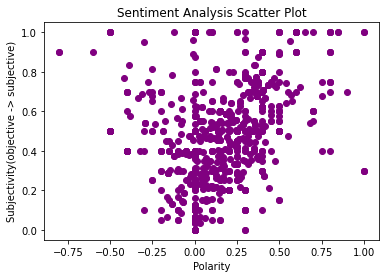

In [108]:
plt.scatter(df['Polarity'], df['Subjectivity'], color='Purple')
plt.title('Sentiment Analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity(objective -> subjective)')
plt.show()

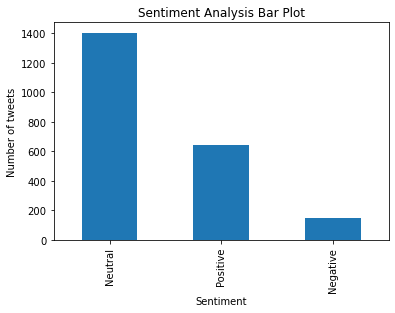

     ------------------------------------- 281.4/281.4 MB 68.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------ 199.7/199.7 kB 101.1 kB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=81dc650b98a21710f858005299b3fc065b5bcedb31a1dd54f927bef47ba94d2a
  Stored in directory: c:\users\aelha\appdata\local\pip\cache\wheels\96\f2\8a\b6465f53b3c21a58960d31ae544861ec2076fc5ae0249ffae8
Successfully built pyspark
     ------------------------------------- 281.4/281.4 MB 87.2 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached py4j-0.10.9.5-py2.py3-none-any.whl (199 kB)
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=9ffb39fc7f0a66d7a8ad69209178b5e171de200d372cd1739de49e10baa21c6b
  Stored in directory

In [109]:
#Create a bar chart to show the count of Positive, Neutral and Negative sentiments
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of tweets')
plt.show()